<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 1, 2021

In [77]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164578,07/18/2021,07/01/2021,07/17/2021,By Month,"2,021",7.0,Nevada,Respiratory diseases,Respiratory failure,J96,0-24,0,0,NaN
164579,07/18/2021,01/01/2020,01/31/2020,By Month,"2,020",1.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN
164580,07/18/2021,02/01/2020,02/29/2020,By Month,"2,020",2.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN
164581,07/18/2021,03/01/2020,03/31/2020,By Month,"2,020",3.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN


In [78]:
#used describe function for data exploration
df.describe(include = 'all')

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
count,164583,164583,164583,164583,152163,127323.000000,164583,164583,164583,164582,164582,122575,123797,42007
unique,1,19,19,3,2,NaN,54,12,24,23,10,3350,3445,1
top,07/18/2021,01/01/2020,07/17/2021,By Month,"2,020",NaN,Arizona,Circulatory diseases,Chronic lower respiratory diseases,J40-J47,0-24,0,0,One or more data cells have counts between 1-9...
freq,164583,31542,31541,127323,92836,NaN,5060,49910,7320,7320,16475,73408,73408,42007
mean,NaN,NaN,NaN,NaN,NaN,5.578851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.233324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [80]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164578,07/18/2021,07/01/2021,07/17/2021,By Month,"2,021",7.0,Nevada,Respiratory diseases,Respiratory failure,J96,0-24,0,0,NaN
164579,07/18/2021,01/01/2020,01/31/2020,By Month,"2,020",1.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN
164580,07/18/2021,02/01/2020,02/29/2020,By Month,"2,020",2.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN
164581,07/18/2021,03/01/2020,03/31/2020,By Month,"2,020",3.0,Nevada,Respiratory diseases,Respiratory failure,J96,25-34,0,0,NaN


In [81]:
#retrieve column counts and group by Age Group
df.groupby('AgeGroup').count()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,CV19_Deaths,Number of Mentions,Flag
AgeGroup,,,,,,,,,,,,,
0-24,16475,16475,16475,16475,15233,12749,16475,16475,16475,16475,13787,13839,2688
25-34,16459,16459,16459,16459,15217,12733,16459,16459,16459,16459,12150,12237,4309
35-44,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,11050,11188,5406
45-54,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,10485,10660,5971
55-64,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,10705,10858,5751
65-74,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,11272,11430,5184
75-84,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,11653,11811,4803
85+,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,11671,11829,4785
All Ages,16456,16456,16456,16456,15214,12730,16456,16456,16456,16456,13443,13586,3013


In [82]:
#drop non-relevant columns
df.drop(['Data As Of', 'Start Date', 'End Date', 'Number of Mentions', 'ICD10_codes', 'Flag'], axis=1, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
df.dropna(subset = ["Year"], inplace=True)
df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
df['Year'] = df['Year'].astype(int, errors = 'raise')
df['Month'] = df['Month'].astype(int, errors = 'raise')
display(df)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
37262,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9.0
37263,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0
37264,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,20.0
37265,By Month,2020,6,United States,Respiratory diseases,Influenza and pneumonia,0-24,18.0
37266,By Month,2020,7,United States,Respiratory diseases,Influenza and pneumonia,0-24,38.0
...,...,...,...,...,...,...,...,...
164555,By Month,2021,3,Nevada,Respiratory diseases,Adult respiratory distress syndrome,All Ages,82.0
164556,By Month,2021,4,Nevada,Respiratory diseases,Adult respiratory distress syndrome,All Ages,75.0
164557,By Month,2021,5,Nevada,Respiratory diseases,Adult respiratory distress syndrome,All Ages,49.0
164558,By Month,2021,6,Nevada,Respiratory diseases,Adult respiratory distress syndrome,All Ages,43.0


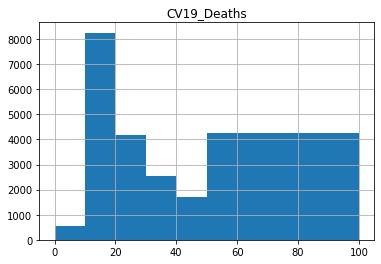

In [83]:
df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,100]);

In [84]:
#remove all non-relevant values from State column
df1 = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df2 = df1[~df1.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
df3 = df2[~df2.Group.str.contains('By Year|By Total', regex=True)]
display(df3)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
41680,By Month,2021,1,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,18.0
41692,By Month,2020,6,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,11.0
41693,By Month,2020,7,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,10.0
41694,By Month,2020,8,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,17.0
41697,By Month,2020,11,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,14.0
...,...,...,...,...,...,...,...,...
164513,By Month,2020,11,Nevada,Respiratory diseases,Adult respiratory distress syndrome,85+,37.0
164514,By Month,2020,12,Nevada,Respiratory diseases,Adult respiratory distress syndrome,85+,118.0
164515,By Month,2021,1,Nevada,Respiratory diseases,Adult respiratory distress syndrome,85+,114.0
164516,By Month,2021,2,Nevada,Respiratory diseases,Adult respiratory distress syndrome,85+,42.0


In [85]:
#df.isnull().sum(axis = 0)
df.describe(include = 'all')


,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
count,28260,28260.000000,28260.000000,28260,28260,28260,28260,28260.000000
unique,1,NaN,NaN,30,12,23,10,NaN
top,By Month,NaN,NaN,United States,Respiratory diseases,COVID-19,All Ages,NaN
freq,28260,NaN,NaN,3492,8044,2637,7676,NaN
mean,NaN,2020.368365,6.240375,NaN,NaN,NaN,NaN,242.634713
std,NaN,0.482370,3.535737,NaN,NaN,NaN,NaN,1629.326018
min,NaN,2020.000000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2020.000000,3.000000,NaN,NaN,NaN,NaN,17.000000
50%,NaN,2020.000000,6.000000,NaN,NaN,NaN,NaN,34.000000
75%,NaN,2021.000000,10.000000,NaN,NaN,NaN,NaN,94.000000
